In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, accuracy_score
from scipy import stats
import numpy as np
import joblib

import warnings
warnings.filterwarnings("ignore")


In [5]:
obesity = pd.read_excel('https://github.com/LucasDataDev/Fiap_dataanalytics/raw/refs/heads/main/Obesity.xlsx')

In [6]:
dict_freq_bebida_comida = {
    "nao": 0,
    "pouco": 1,
    "frequentemente": 2,
    "sempre": 3
}

In [7]:
obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Weight_correto
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0.0,1.0,no,Public_Transportation,Normal_Weight,64.0
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,56.0
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,77.0
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,87.0
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,89.8


In [8]:
obesity.tail()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Weight_correto
2106,Female,20976842,171073.0,131408528.0,yes,yes,3,3,Sometimes,no,1728139,no,1676269.0,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,131.40
2107,Female,21982942,1748584.0,133742943.0,yes,yes,3,3,Sometimes,no,200513,no,134139.0,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,133.74
2108,Female,22524036,1752206.0,133689352.0,yes,yes,3,3,Sometimes,no,2054193,no,1414209.0,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,133.68
2109,Female,24361936,173945.0,133346641.0,yes,yes,3,3,Sometimes,no,2852339,no,1139107.0,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,133.34
2110,Female,23664709,1738836.0,133472641.0,yes,yes,3,3,Sometimes,no,2863513,no,1026452.0,0.714137,Sometimes,Public_Transportation,Obesity_Type_III,133.47


In [9]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Weight_correto
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2111.000000
mean,1.489790e+07,1.125941e+06,5.850877e+07,8.129461e+05,6.814160e+05,1.158451e+06,4.281866e+05,1.819331e+05,86.556874
std,1.307597e+07,8.014948e+05,4.976613e+07,1.136965e+06,1.182663e+06,1.096148e+06,7.632395e+05,4.893283e+05,26.143610
min,1.400000e+01,1.450000e+00,3.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,39.000000
25%,2.500000e+01,1.830000e+00,8.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,1.245050e-01,0.000000e+00,65.470000
50%,1.922326e+07,1.631547e+06,6.880369e+07,3.000000e+00,3.000000e+00,1.221281e+06,1.000000e+00,6.253500e-01,83.000000
75%,2.422283e+07,1.747596e+06,1.048240e+08,2.060030e+06,1.153420e+06,2.160736e+06,1.016148e+06,1.000000e+00,107.290000
max,5.513788e+07,1.975663e+06,1.650573e+08,2.998441e+06,3.999591e+06,2.999495e+06,2.999918e+06,1.990617e+06,173.000000


In [10]:
obesity.dtypes

Gender             object
Age                 int64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC                int64
NCP                 int64
CAEC               object
SMOKE              object
CH2O                int64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
Weight_correto    float64
dtype: object

In [11]:
obesity["Age"] = obesity["Age"].astype(str).str[:2].astype(int)
obesity["Height"] = obesity["Height"].astype(str).str.replace(".", "", regex=False).str[:3]
obesity["Height"] = obesity["Height"].str[0] + "." + obesity["Height"].str[1:]
obesity["Height"] = obesity["Height"].astype(float)


In [12]:
obesity

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Weight_correto
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0.0,1.000000,no,Public_Transportation,Normal_Weight,64.00
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3.0,0.000000,Sometimes,Public_Transportation,Normal_Weight,56.00
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2.0,1.000000,Frequently,Public_Transportation,Normal_Weight,77.00
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2.0,0.000000,Frequently,Walking,Overweight_Level_I,87.00
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0.0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,89.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.71,131408528.0,yes,yes,3,3,Sometimes,no,1728139,no,1676269.0,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,131.40
2107,Female,21,1.74,133742943.0,yes,yes,3,3,Sometimes,no,200513,no,134139.0,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,133.74
2108,Female,22,1.75,133689352.0,yes,yes,3,3,Sometimes,no,2054193,no,1414209.0,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,133.68
2109,Female,24,1.73,133346641.0,yes,yes,3,3,Sometimes,no,2852339,no,1139107.0,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,133.34


In [13]:
obesity['Age'].value_counts(normalize=True)*100

21    12.837518
18    11.274278
19     8.810990
23     7.721459
22     7.626717
25     7.531975
26     6.584557
20     6.489815
24     3.979157
17     3.884415
30     3.079109
31     2.179062
29     2.036949
33     1.705353
37     1.563240
38     1.468498
27     1.468498
16     1.373757
34     1.326386
40     1.042160
28     1.042160
39     0.947418
32     0.852676
36     0.568451
35     0.568451
41     0.521080
43     0.331596
42     0.236855
55     0.236855
45     0.189484
47     0.094742
56     0.047371
51     0.047371
44     0.047371
14     0.047371
15     0.047371
50     0.047371
52     0.047371
46     0.047371
61     0.047371
Name: Age, dtype: float64

In [14]:
obesity['Height'].value_counts(normalize=True)*100

1.75    6.821412
1.70    6.063477
1.62    4.926575
1.65    4.310753
1.60    4.216011
1.78    3.742302
1.74    3.505448
1.76    3.505448
1.71    3.410706
1.64    3.221222
1.80    3.126480
1.66    3.079109
1.67    2.936997
1.69    2.936997
1.61    2.794884
1.63    2.794884
1.68    2.700142
1.72    2.652771
1.77    2.652771
1.73    2.558029
1.81    2.179062
1.79    2.084320
1.82    1.942207
1.56    1.894837
1.84    1.894837
1.55    1.752724
1.85    1.752724
1.58    1.705353
1.83    1.657982
1.59    1.373757
1.53    1.136902
1.50    1.136902
1.52    1.089531
1.54    1.089531
1.57    0.947418
1.87    0.805306
1.86    0.663193
1.88    0.521080
1.90    0.473709
1.91    0.426338
1.51    0.378967
1.89    0.284225
1.48    0.236855
1.93    0.189484
1.45    0.094742
1.49    0.094742
1.94    0.094742
1.92    0.047371
1.98    0.047371
1.97    0.047371
Name: Height, dtype: float64

In [15]:
obesity['Weight_correto'].value_counts(normalize=True)*100

80.00     2.842255
70.00     2.036949
50.00     1.989578
75.00     1.894837
60.00     1.752724
            ...   
92.69     0.047371
72.46     0.047371
74.43     0.047371
84.75     0.047371
133.34    0.047371
Name: Weight_correto, Length: 1338, dtype: float64

In [16]:
obesity['Weight_correto'].describe()

count    2111.000000
mean       86.556874
std        26.143610
min        39.000000
25%        65.470000
50%        83.000000
75%       107.290000
max       173.000000
Name: Weight_correto, dtype: float64

In [17]:
obesity['Obesity'].value_counts(normalize=True)*100

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: Obesity, dtype: float64

In [18]:
obesity.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
Weight_correto    0
dtype: int64

In [19]:
obesity['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [20]:
obesity['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [21]:
obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Weight_correto
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0.0,1.0,no,Public_Transportation,Normal_Weight,64.0
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,56.0
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,77.0
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,87.0
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,89.8


In [22]:
obesity['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
obesity['family_history'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
obesity['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
obesity['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [26]:
obesity['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
obesity['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
obesity['Gender'] = obesity['Gender'].replace(['Female','Male'],[1,0])
obesity['family_history'] = obesity['family_history'].replace(['yes','no'],[1,0])
obesity['FAVC'] = obesity['FAVC'].replace(['no','yes'],[0,1])
obesity['SMOKE'] = obesity['SMOKE'].replace(['no','yes'],[0,1])

In [29]:
obesity['SCC'] = obesity['SCC'].replace(['no','yes'],[0,1])

In [30]:
obesity

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Weight_correto
0,1,21,1.62,64.0,1,0,2,3,Sometimes,0,2,0,0.0,1.000000,no,Public_Transportation,Normal_Weight,64.00
1,1,21,1.52,56.0,1,0,3,3,Sometimes,1,3,1,3.0,0.000000,Sometimes,Public_Transportation,Normal_Weight,56.00
2,0,23,1.80,77.0,1,0,2,3,Sometimes,0,2,0,2.0,1.000000,Frequently,Public_Transportation,Normal_Weight,77.00
3,0,27,1.80,87.0,0,0,3,3,Sometimes,0,2,0,2.0,0.000000,Frequently,Walking,Overweight_Level_I,87.00
4,0,22,1.78,89.8,0,0,2,1,Sometimes,0,2,0,0.0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,89.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131408528.0,1,1,3,3,Sometimes,0,1728139,0,1676269.0,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,131.40
2107,1,21,1.74,133742943.0,1,1,3,3,Sometimes,0,200513,0,134139.0,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,133.74
2108,1,22,1.75,133689352.0,1,1,3,3,Sometimes,0,2054193,0,1414209.0,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,133.68
2109,1,24,1.73,133346641.0,1,1,3,3,Sometimes,0,2852339,0,1139107.0,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,133.34


In [31]:
obesity_tratada = obesity.rename(columns={
    "Gender": "sexo",
    "Age": "idade",
    "Height": "altura",
    "Weight_correto": "peso",
    "family_history": "historico_familiar",
    "SMOKE": "fuma",
    "SCC" : "monitora_calorias_diario",
    "CAEC" : "come_entre_refeicoes",
    "CALC" : "freq_bebida_alcoolica",
    "MTRANS" : "meio_transporte",
    "Obesity" : "obesidade",
    "FAVC" : "freq_alimentos_caloricos",
})

In [32]:
obesity_tratada

,sexo,idade,altura,Weight,historico_familiar,freq_alimentos_caloricos,FCVC,NCP,come_entre_refeicoes,fuma,CH2O,monitora_calorias_diario,FAF,TUE,freq_bebida_alcoolica,meio_transporte,obesidade,peso
0,1,21,1.62,64.0,1,0,2,3,Sometimes,0,2,0,0.0,1.000000,no,Public_Transportation,Normal_Weight,64.00
1,1,21,1.52,56.0,1,0,3,3,Sometimes,1,3,1,3.0,0.000000,Sometimes,Public_Transportation,Normal_Weight,56.00
2,0,23,1.80,77.0,1,0,2,3,Sometimes,0,2,0,2.0,1.000000,Frequently,Public_Transportation,Normal_Weight,77.00
3,0,27,1.80,87.0,0,0,3,3,Sometimes,0,2,0,2.0,0.000000,Frequently,Walking,Overweight_Level_I,87.00
4,0,22,1.78,89.8,0,0,2,1,Sometimes,0,2,0,0.0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,89.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131408528.0,1,1,3,3,Sometimes,0,1728139,0,1676269.0,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,131.40
2107,1,21,1.74,133742943.0,1,1,3,3,Sometimes,0,200513,0,134139.0,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,133.74
2108,1,22,1.75,133689352.0,1,1,3,3,Sometimes,0,2054193,0,1414209.0,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,133.68
2109,1,24,1.73,133346641.0,1,1,3,3,Sometimes,0,2852339,0,1139107.0,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,133.34


In [33]:
obesity_tratada = obesity_tratada[["sexo",
                                   "idade",
                                   "altura",
                                   "peso",
                                   "historico_familiar",
                                   "freq_alimentos_caloricos",
                                   "fuma",
                                   "monitora_calorias_diario",
                                   "come_entre_refeicoes",
                                   "freq_bebida_alcoolica",
                                   "meio_transporte",
                                   "obesidade"                                   
                                   ]]

In [34]:
obesity_tratada

,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade
0,1,21,1.62,64.00,1,0,0,0,Sometimes,no,Public_Transportation,Normal_Weight
1,1,21,1.52,56.00,1,0,1,1,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,0,23,1.80,77.00,1,0,0,0,Sometimes,Frequently,Public_Transportation,Normal_Weight
3,0,27,1.80,87.00,0,0,0,0,Sometimes,Frequently,Walking,Overweight_Level_I
4,0,22,1.78,89.80,0,0,0,0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21,1.74,133.74,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22,1.75,133.68,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24,1.73,133.34,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III


In [35]:
obesity_tratada["IMC"] = obesity_tratada["peso"] / (obesity_tratada["altura"] ** 2)

In [36]:
obesity_tratada["IMC"] = obesity_tratada["IMC"].round(2)

In [37]:
obesity_tratada

,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade,IMC
0,1,21,1.62,64.00,1,0,0,0,Sometimes,no,Public_Transportation,Normal_Weight,24.39
1,1,21,1.52,56.00,1,0,1,1,Sometimes,Sometimes,Public_Transportation,Normal_Weight,24.24
2,0,23,1.80,77.00,1,0,0,0,Sometimes,Frequently,Public_Transportation,Normal_Weight,23.77
3,0,27,1.80,87.00,0,0,0,0,Sometimes,Frequently,Walking,Overweight_Level_I,26.85
4,0,22,1.78,89.80,0,0,0,0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,44.94
2107,1,21,1.74,133.74,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,44.17
2108,1,22,1.75,133.68,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,43.65
2109,1,24,1.73,133.34,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III,44.55


In [38]:
obesity_tratada = obesity_tratada[["sexo",
                                   "idade",
                                   "altura",
                                   "peso",
                                   "IMC",
                                   "historico_familiar",
                                   "freq_alimentos_caloricos",
                                   "fuma",
                                   "monitora_calorias_diario",
                                   "come_entre_refeicoes",
                                   "freq_bebida_alcoolica",
                                   "meio_transporte",
                                   "obesidade"                                   
                                   ]]

In [39]:
obesity_tratada

,sexo,idade,altura,peso,IMC,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade
0,1,21,1.62,64.00,24.39,1,0,0,0,Sometimes,no,Public_Transportation,Normal_Weight
1,1,21,1.52,56.00,24.24,1,0,1,1,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,0,23,1.80,77.00,23.77,1,0,0,0,Sometimes,Frequently,Public_Transportation,Normal_Weight
3,0,27,1.80,87.00,26.85,0,0,0,0,Sometimes,Frequently,Walking,Overweight_Level_I
4,0,22,1.78,89.80,28.34,0,0,0,0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,44.94,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21,1.74,133.74,44.17,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22,1.75,133.68,43.65,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24,1.73,133.34,44.55,1,1,0,0,Sometimes,Sometimes,Public_Transportation,Obesity_Type_III


In [40]:
obesity_tratada['come_entre_refeicoes'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [41]:
obesity_tratada['freq_bebida_alcoolica'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [42]:
obesity_tratada['meio_transporte'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [43]:
obesity_tratada['obesidade'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [44]:
obesity_tratada["come_entre_refeicoes"] = obesity_tratada["come_entre_refeicoes"].replace({
    "no": "nao",
    "Sometimes": "pouco",
    "Frequently": "frequentemente",
    "Always": "sempre"
})

In [45]:
obesity_tratada["freq_bebida_alcoolica"] = obesity_tratada["freq_bebida_alcoolica"].replace({
    "no": "nao",
    "Sometimes": "pouco",
    "Frequently": "frequentemente",
    "Always": "sempre"
})

In [46]:
obesity_tratada["meio_transporte"] = obesity_tratada["meio_transporte"].replace({
    "Public_Transportation": "publico",
    "Walking": "caminhar",
    "Automobile": "carro",
    "Motorbike": "moto",
    "Bike": "bicicleta"
})

In [47]:
obesity_tratada["obesidade"] = obesity_tratada["obesidade"].replace({
    "Normal_Weight": "normal",
    "Overweight_Level_I": "sobrepeso_nivel_I",
    "Overweight_Level_II": "sobrepeso_nivel_II",
    "Obesity_Type_I": "obesidade_tipo_I",
    "Insufficient_Weight": "peso_insuficiente",
    "Obesity_Type_II" : "obesidade_tipo_II",
    "Obesity_Type_III" : "obesidade_tipo_III"
})

In [48]:
obesity_tratada

,sexo,idade,altura,peso,IMC,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade
0,1,21,1.62,64.00,24.39,1,0,0,0,pouco,nao,publico,normal
1,1,21,1.52,56.00,24.24,1,0,1,1,pouco,pouco,publico,normal
2,0,23,1.80,77.00,23.77,1,0,0,0,pouco,frequentemente,publico,normal
3,0,27,1.80,87.00,26.85,0,0,0,0,pouco,frequentemente,caminhar,sobrepeso_nivel_I
4,0,22,1.78,89.80,28.34,0,0,0,0,pouco,pouco,publico,sobrepeso_nivel_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,44.94,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2107,1,21,1.74,133.74,44.17,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2108,1,22,1.75,133.68,43.65,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2109,1,24,1.73,133.34,44.55,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III


In [49]:
obesity_tratada['obesidade'].unique()

array(['normal', 'sobrepeso_nivel_I', 'sobrepeso_nivel_II',
       'obesidade_tipo_I', 'peso_insuficiente', 'obesidade_tipo_II',
       'obesidade_tipo_III'], dtype=object)

<Axes: >

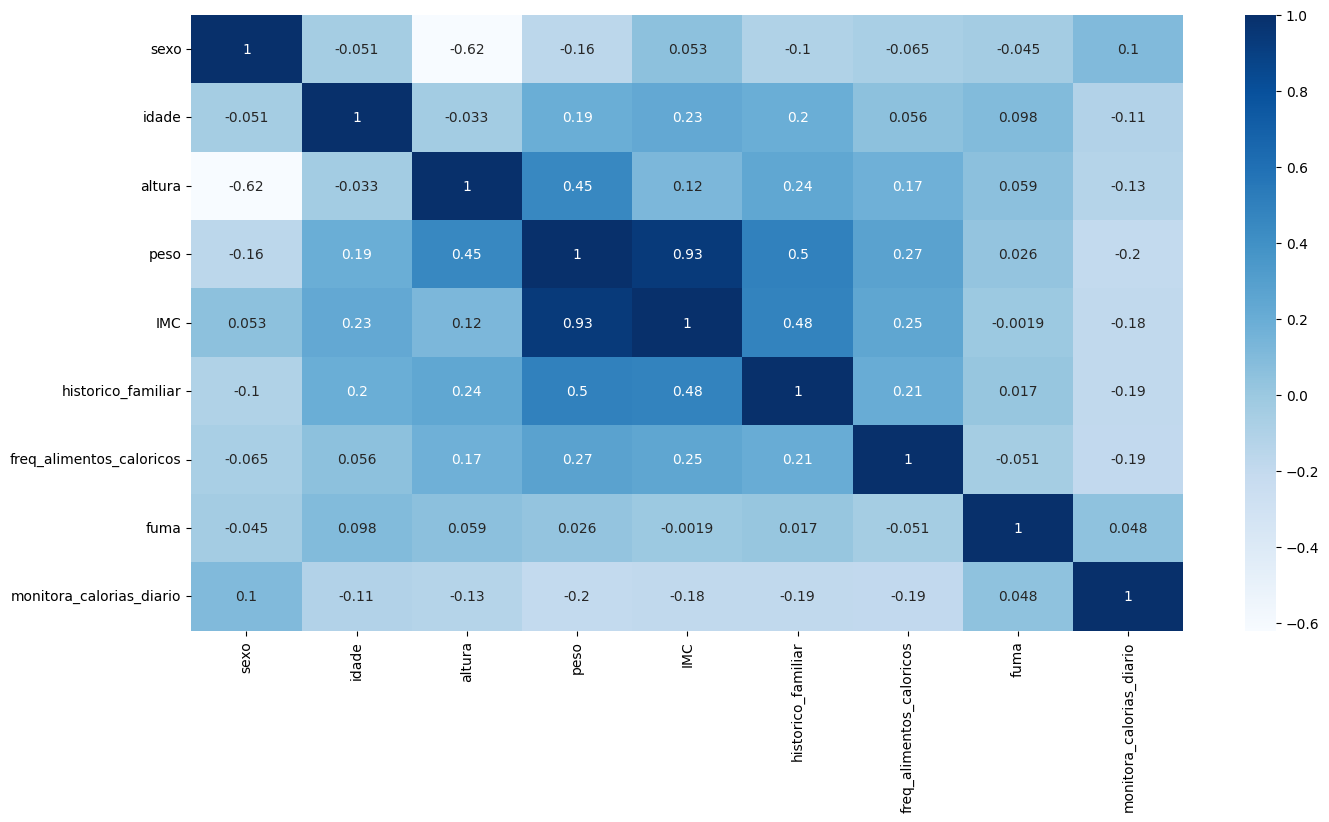

In [50]:
corr = obesity_tratada.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, cmap="Blues", annot=True)

In [51]:
obesity_tratada.drop(['IMC'], axis=1, inplace=True)

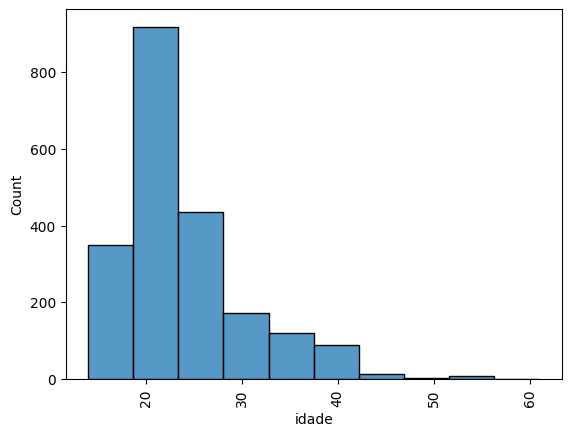

In [52]:
sns.histplot(data=obesity_tratada, x='idade', bins=10) 
plt.xticks(rotation=90)
plt.show()

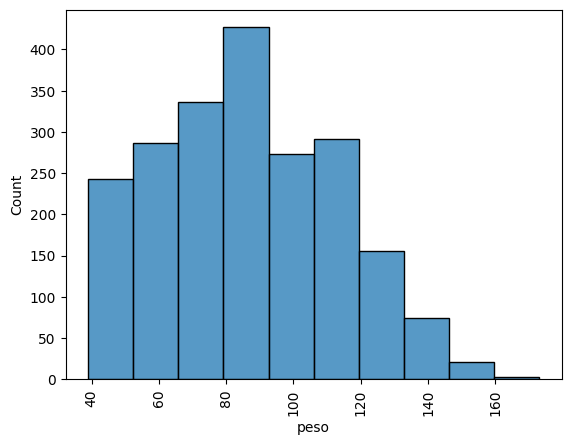

In [53]:
sns.histplot(data=obesity_tratada, x='peso', bins=10) 
plt.xticks(rotation=90)
plt.show()

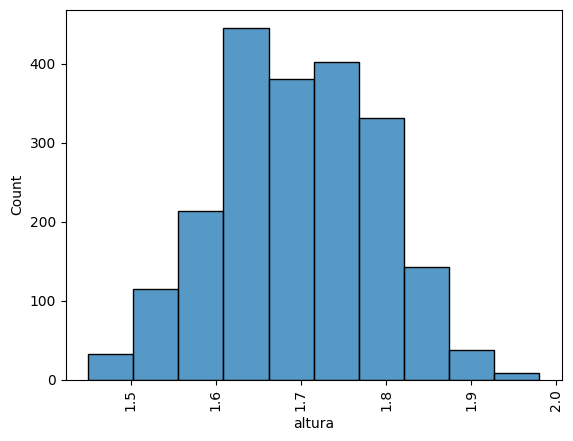

In [54]:
sns.histplot(data=obesity_tratada, x='altura', bins=10) 
plt.xticks(rotation=90)
plt.show()

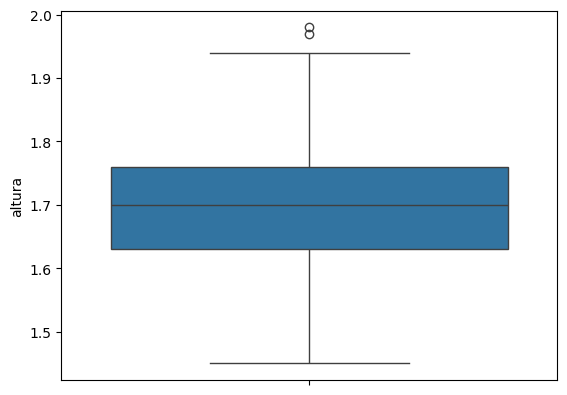

In [55]:
sns.boxplot(data=obesity_tratada, y='altura') 
plt.xticks(rotation=45)
plt.show()

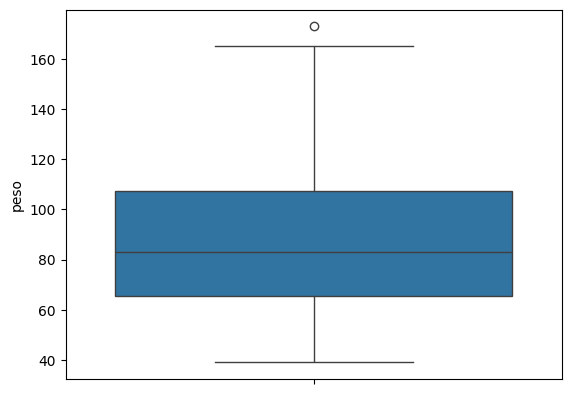

In [56]:
sns.boxplot(data=obesity_tratada, y='peso') 
plt.xticks(rotation=45)
plt.show()

In [57]:
obesity_tratada

,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade
0,1,21,1.62,64.00,1,0,0,0,pouco,nao,publico,normal
1,1,21,1.52,56.00,1,0,1,1,pouco,pouco,publico,normal
2,0,23,1.80,77.00,1,0,0,0,pouco,frequentemente,publico,normal
3,0,27,1.80,87.00,0,0,0,0,pouco,frequentemente,caminhar,sobrepeso_nivel_I
4,0,22,1.78,89.80,0,0,0,0,pouco,pouco,publico,sobrepeso_nivel_II
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2107,1,21,1.74,133.74,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2108,1,22,1.75,133.68,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2109,1,24,1.73,133.34,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III


In [58]:
obesity_tratada.to_excel('obesity_tratada_new.xlsx', index=False)

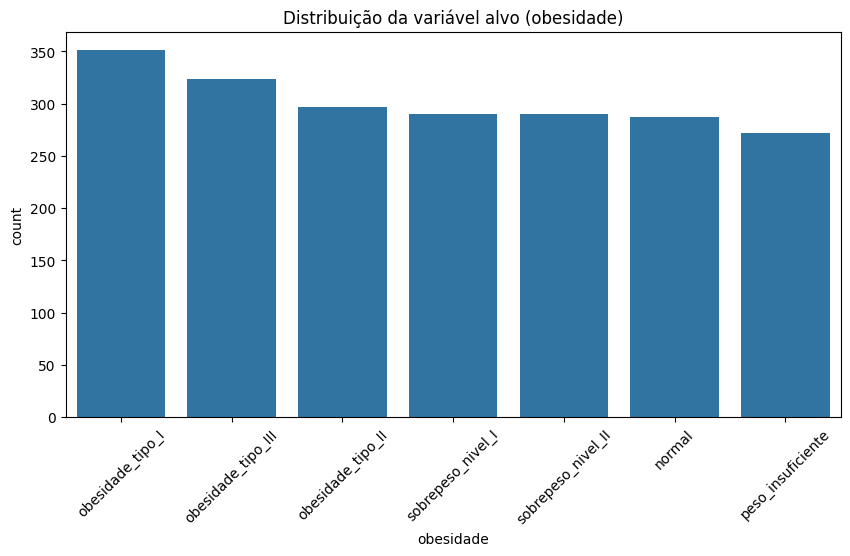

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x="obesidade", data=obesity_tratada, order=obesity_tratada["obesidade"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribuição da variável alvo (obesidade)")
plt.show()

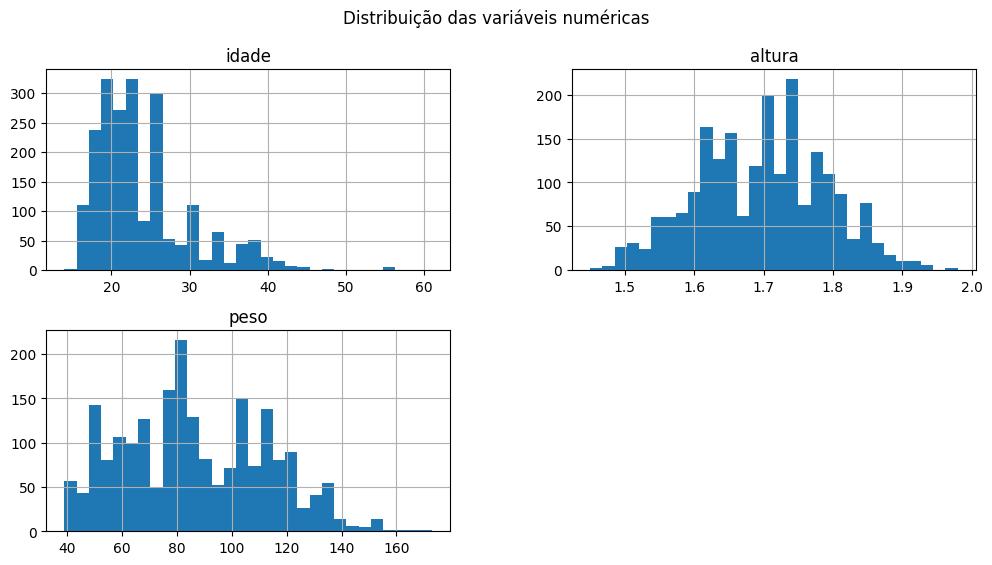

In [60]:
obesity_tratada[["idade", "altura", "peso"]].hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()

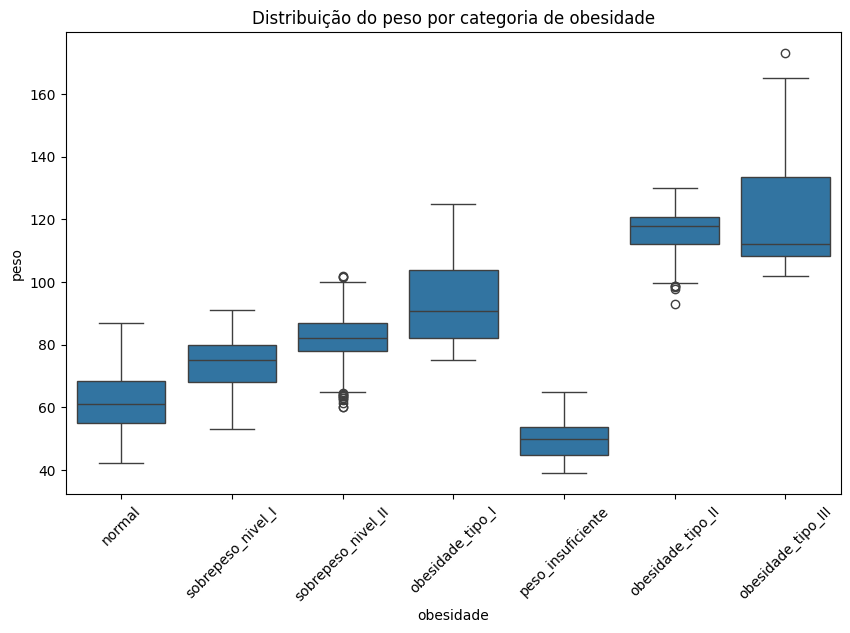

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x="obesidade", y="peso", data=obesity_tratada)
plt.xticks(rotation=45)
plt.title("Distribuição do peso por categoria de obesidade")
plt.show()

Divisão da base para treino e teste

In [62]:
obesity_tratada

,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte,obesidade
0,1,21,1.62,64.00,1,0,0,0,pouco,nao,publico,normal
1,1,21,1.52,56.00,1,0,1,1,pouco,pouco,publico,normal
2,0,23,1.80,77.00,1,0,0,0,pouco,frequentemente,publico,normal
3,0,27,1.80,87.00,0,0,0,0,pouco,frequentemente,caminhar,sobrepeso_nivel_I
4,0,22,1.78,89.80,0,0,0,0,pouco,pouco,publico,sobrepeso_nivel_II
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2107,1,21,1.74,133.74,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2108,1,22,1.75,133.68,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III
2109,1,24,1.73,133.34,1,1,0,0,pouco,pouco,publico,obesidade_tipo_III


In [63]:
le = LabelEncoder()
obesity_tratada['obesidade'] = le.fit_transform(obesity_tratada['obesidade'])

In [64]:
obesity_tratada.to_excel('obesity_tratada_final.xlsx', index=False)

In [65]:
X = obesity_tratada.drop("obesidade", axis=1)
y = obesity_tratada["obesidade"]

In [66]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler=['idade', 'altura', 'peso']):
        self.min_max_scaler = min_max_scaler

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if set(self.min_max_scaler).issubset(X.columns):
            min_max_enc = MinMaxScaler()
            X[self.min_max_scaler] = min_max_enc.fit_transform(X[self.min_max_scaler])
            return X
        else:
            print('Uma ou mais features não estão no DataFrame')
            return X

In [67]:
class OneHotEncodingNames(BaseEstimator, TransformerMixin):
    def __init__(self, OneHotEncoding=['meio_transporte']):
        self.OneHotEncoding = OneHotEncoding

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if set(self.OneHotEncoding).issubset(X.columns):

            # Aplicando o OneHotEncoder
            one_hot_enc = OneHotEncoder(sparse=False)
            one_hot_encoded_array = one_hot_enc.fit_transform(X[self.OneHotEncoding])
            feature_names = one_hot_enc.get_feature_names_out(self.OneHotEncoding)

            # Criando novo DataFrame com as colunas codificadas
            df_OneHotEncoding = pd.DataFrame(one_hot_encoded_array, columns=feature_names, index=X.index)

            # Mantendo o restante das colunas
            outras_features = [col for col in X.columns if col not in self.OneHotEncoding]
            df_concat = pd.concat([df_OneHotEncoding, X[outras_features]], axis=1)

            return df_concat

        else:
            print('Uma ou mais features não estão no DataFrame')
            return X

In [68]:
class OrdinalFeature(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_feature=['come_entre_refeicoes', 'freq_bebida_alcoolica']):
        self.ordinal_feature = ordinal_feature

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if set(self.ordinal_feature).issubset(X.columns):
            ordinal_encoder = OrdinalEncoder()
            X[self.ordinal_feature] = ordinal_encoder.fit_transform(X[self.ordinal_feature])
            return X
        else:
            print(f"Uma ou mais colunas {self.ordinal_feature} não estão no DataFrame")
            return X

In [69]:
def run_pipeline(X):

    pipe = Pipeline([
        ('OneHotEncoding', OneHotEncodingNames()),
        ('ordinal_feature', OrdinalFeature()),
        ('min_max_scaler', MinMax()),

    ])
    X_transformed = pipe.fit_transform(X)
    return X_transformed

In [70]:
X_tratado = run_pipeline(X)

In [71]:
X_tratado

,meio_transporte_bicicleta,meio_transporte_caminhar,meio_transporte_carro,meio_transporte_moto,meio_transporte_publico,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica
0,0.0,0.0,0.0,0.0,1.0,1,0.148936,0.320755,0.186567,1,0,0,0,2.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1,0.148936,0.132075,0.126866,1,0,1,1,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,0,0.191489,0.660377,0.283582,1,0,0,0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0,0.276596,0.660377,0.358209,0,0,0,0,2.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0,0.170213,0.622642,0.379104,0,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,0.0,1.0,1,0.127660,0.490566,0.689552,1,1,0,0,2.0,2.0
2107,0.0,0.0,0.0,0.0,1.0,1,0.148936,0.547170,0.707015,1,1,0,0,2.0,2.0
2108,0.0,0.0,0.0,0.0,1.0,1,0.170213,0.566038,0.706567,1,1,0,0,2.0,2.0
2109,0.0,0.0,0.0,0.0,1.0,1,0.212766,0.528302,0.704030,1,1,0,0,2.0,2.0


In [72]:
X

,sexo,idade,altura,peso,historico_familiar,freq_alimentos_caloricos,fuma,monitora_calorias_diario,come_entre_refeicoes,freq_bebida_alcoolica,meio_transporte
0,1,21,1.62,64.00,1,0,0,0,pouco,nao,publico
1,1,21,1.52,56.00,1,0,1,1,pouco,pouco,publico
2,0,23,1.80,77.00,1,0,0,0,pouco,frequentemente,publico
3,0,27,1.80,87.00,0,0,0,0,pouco,frequentemente,caminhar
4,0,22,1.78,89.80,0,0,0,0,pouco,pouco,publico
...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20,1.71,131.40,1,1,0,0,pouco,pouco,publico
2107,1,21,1.74,133.74,1,1,0,0,pouco,pouco,publico
2108,1,22,1.75,133.68,1,1,0,0,pouco,pouco,publico
2109,1,24,1.73,133.34,1,1,0,0,pouco,pouco,publico


In [73]:
y

0       0
1       0
2       0
3       5
4       6
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: obesidade, Length: 2111, dtype: int32

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [99]:
X_train_tratado = run_pipeline(X_train)
X_test_tratado = run_pipeline(X_test)

In [100]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_tratado, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_pred = modelo_rf.predict(X_test_tratado)

In [102]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {acc:.2f}")

Matriz de Confusão:
[[51  0  0  0  1  6  0]
 [ 0 62  6  0  0  0  2]
 [ 0  5 54  1  0  0  0]
 [ 0  0  0 65  0  0  0]
 [ 5  0  0  0 49  0  0]
 [ 9  3  0  0  0 30 16]
 [ 3 13  0  0  0  2 40]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        58
           1       0.75      0.89      0.81        70
           2       0.90      0.90      0.90        60
           3       0.98      1.00      0.99        65
           4       0.98      0.91      0.94        54
           5       0.79      0.52      0.62        58
           6       0.69      0.69      0.69        58

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.83      0.83      0.83       423


Acurácia: 0.83


In [79]:
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_tratado, y_train)


LogisticRegression(max_iter=1000)

In [80]:
y_pred_lr = modelo_lr.predict(X_test_tratado)

In [81]:
print("\n[Logistic Regression]")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
acc = accuracy_score(y_test, y_pred_lr)
print(f"\nAcurácia: {acc:.2f}")


[Logistic Regression]
[[22  1  0  0 18 11  6]
 [ 0 44 19  5  0  1  1]
 [ 0  1 58  1  0  0  0]
 [ 0  0  0 65  0  0  0]
 [ 1  0  0  0 52  0  1]
 [ 3 11  0  4  0 35  5]
 [ 5 15 10  3  0  2 23]]
              precision    recall  f1-score   support

           0       0.71      0.38      0.49        58
           1       0.61      0.63      0.62        70
           2       0.67      0.97      0.79        60
           3       0.83      1.00      0.91        65
           4       0.74      0.96      0.84        54
           5       0.71      0.60      0.65        58
           6       0.64      0.40      0.49        58

    accuracy                           0.71       423
   macro avg       0.70      0.71      0.68       423
weighted avg       0.70      0.71      0.69       423


Acurácia: 0.71


In [82]:
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train_tratado, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
y_pred_dt = modelo_dt.predict(X_test_tratado)

In [84]:
print("\n[DecisionTree]")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
acc = accuracy_score(y_test, y_pred_dt)
print(f"\nAcurácia: {acc:.2f}")


[DecisionTree]
[[44  0  0  0  2 11  1]
 [ 0 56 14  0  0  0  0]
 [ 0  7 52  1  0  0  0]
 [ 0  0  0 65  0  0  0]
 [ 2  0  0  0 52  0  0]
 [ 2  2  0  0  0 29 25]
 [ 0 17  0  0  0  2 39]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        58
           1       0.68      0.80      0.74        70
           2       0.79      0.87      0.83        60
           3       0.98      1.00      0.99        65
           4       0.96      0.96      0.96        54
           5       0.69      0.50      0.58        58
           6       0.60      0.67      0.63        58

    accuracy                           0.80       423
   macro avg       0.80      0.79      0.79       423
weighted avg       0.80      0.80      0.79       423


Acurácia: 0.80


In [85]:
modelo_xbg = GradientBoostingClassifier(random_state=42)
modelo_xbg.fit(X_train_tratado, y_train)

GradientBoostingClassifier(random_state=42)

In [86]:
y_pred_xbg = modelo_xbg.predict(X_test_tratado)

In [87]:
print("\n[XBG]")
print(confusion_matrix(y_test, y_pred_xbg))
print(classification_report(y_test, y_pred_xbg))
acc = accuracy_score(y_test, y_pred_xbg)
print(f"\nAcurácia: {acc:.2f}")


[XBG]
[[48  0  0  0  2  8  0]
 [ 0 54 16  0  0  0  0]
 [ 0  2 57  1  0  0  0]
 [ 0  0  0 65  0  0  0]
 [ 2  0  0  0 52  0  0]
 [ 2  1  0  0  0 29 26]
 [ 0 15  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        58
           1       0.75      0.77      0.76        70
           2       0.78      0.95      0.86        60
           3       0.98      1.00      0.99        65
           4       0.96      0.96      0.96        54
           5       0.78      0.50      0.61        58
           6       0.62      0.74      0.68        58

    accuracy                           0.82       423
   macro avg       0.83      0.82      0.82       423
weighted avg       0.83      0.82      0.82       423


Acurácia: 0.82


In [104]:
modelo_kn = KNeighborsClassifier(n_neighbors=6)
modelo_kn.fit(X_train_tratado, y_train)

KNeighborsClassifier(n_neighbors=6)

In [105]:
y_pred_kn = modelo_kn.predict(X_test_tratado)

In [106]:
print("\n[KN]")
print(confusion_matrix(y_test, y_pred_kn))
print(classification_report(y_test, y_pred_kn))
acc = accuracy_score(y_test, y_pred_kn)
print(f"\nAcurácia: {acc:.2f}")


[KN]
[[38  0  0  0  7  5  8]
 [ 2 54 10  0  1  2  1]
 [ 0  3 55  1  1  0  0]
 [ 0  0  0 65  0  0  0]
 [ 4  0  0  0 50  0  0]
 [ 6  6  1  0  1 37  7]
 [10  8  0  0  0  2 38]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        58
           1       0.76      0.77      0.77        70
           2       0.83      0.92      0.87        60
           3       0.98      1.00      0.99        65
           4       0.83      0.93      0.88        54
           5       0.80      0.64      0.71        58
           6       0.70      0.66      0.68        58

    accuracy                           0.80       423
   macro avg       0.79      0.79      0.79       423
weighted avg       0.80      0.80      0.79       423


Acurácia: 0.80


In [90]:
joblib.dump(modelo_rf, 'rf.joblib')

['rf.joblib']

In [91]:
joblib.dump(modelo_xbg, 'xbg.joblib')

['xbg.joblib']